### Decision Tree

#### What is Decision Tree?

- Decision Tree is a graphical representation of all possible solutions based on some conditions to make decision

#### Entropy

- E = -plog2p-qlog2q
    - p(probability of success)
        = favourable events/total no of events
    - q(probability of failure)
        = l-p
    - log2p = logp/log2

- Find entropy for flipping a coin
    - E(H) = -1/2log2(1/2)-1/2log2(1/2)
    - E(T)

#### Information Gain

- IG = E(parent)-[AVG entropy of children]

In [1]:
import pandas as pd

In [3]:
bird_df = pd.read_csv("https://raw.githubusercontent.com/MVGopi/machineLearning_with_Python/master/bird.csv")
bird_df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [4]:
bird_df["type"].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [5]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [6]:
bird_df.isnull().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [7]:
bird_df.dropna(inplace=True)

In [8]:
bird_df.isnull().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [9]:
bird_df["type"].value_counts()

SO    124
SW    116
W      64
R      48
P      38
T      23
Name: type, dtype: int64

C:\Users\Rajesh Kommineni\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='type'>

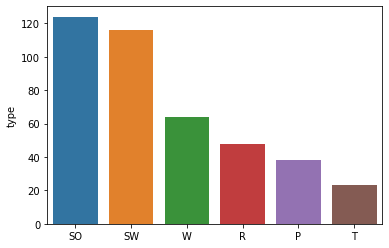

In [12]:
import seaborn as sns

sns.barplot(bird_df["type"].value_counts().index,bird_df["type"].value_counts())

In [13]:
X = bird_df.drop(["id","type"],axis=1)

y = bird_df["type"]

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
confusion_matrix(y_test,y_pred)

array([[ 6,  0,  1,  0,  0,  5],
       [ 0,  7,  0,  1,  0,  0],
       [ 0,  2, 37,  1,  0,  0],
       [ 4,  2,  1, 25,  3,  9],
       [ 0,  0,  0,  1,  3,  2],
       [ 3,  4,  0,  3,  0,  4]], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.6612903225806451

In [35]:
from sklearn.tree import export_graphviz

export_graphviz(model,out_file='bird.dot',
                feature_names=X_train.columns,
                class_names=bird_df['type'].unique(),
               rounded=True,filled=True)

In [36]:
from six import StringIO
from IPython.display import Image
import pydotplus

In [37]:
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,filled=True,
               rounded=True,feature_names=X_train.columns,
               class_names=bird_df["type"].unique())

In [38]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [39]:
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: 'C:\Users\Rajesh' is not recognized as an internal or external command,
operable program or batch file.


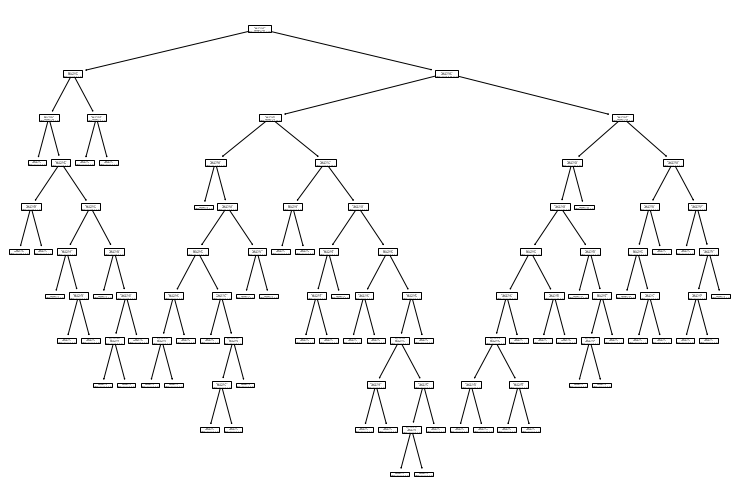

In [43]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(model)
plt.savefig("bird.png")
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.8064516129032258